In [105]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np


Problem description: How would you throw stones at a sqaure surface to esitmate pi?

Answer: Draw a circle inside the square, then use a monte carlo simulation, calculate the Euclidean distance from each randomly sampled point to the middle of the circle to estimate pi.

In [106]:
# program 1

### Euclidean distance calculator 

def dist_cal (x1, y1 ,x2, y2):
    '''
    
    '''
    distance = math.sqrt((x1 - x2)**2 + (y1 -y2)**2)
    
    return distance

### Random points generator

def create_random(n_val): # pick random number in field we are working in
    point_list = []
    for i in range(n_val):
        x = random.randint(-10000, 10000) 
        y = random.randint(-10000, 10000)
        
        point_list.append([x,y])
    return point_list

if __name__ == '__main__':
  inside = 0
  outside = 0
  n_val = int(input("\nEnter the number of points that will be generated: "))
  
  
  points = create_random(n_val)
  
  for i in points:
      if dist_cal(i[0],i[1], 0,0) <= 10000: # check if random points are in circle
          inside = inside + 1  # if they are iterate inside variable 
  
  
  
  print ('%0.8f' % (4*inside / (n_val))) 


Enter the number of points that will be generated: 1000
3.21200000


## Program 2 with Visualization 

In [108]:
from __future__ import division
from random import random
from math import pi
import matplotlib.pyplot as plt

def stone_thrown(length_of_field=1):
    '''
    Simulate a random location of stone thrown
    '''
    s = [(.5 - random()) * length_of_field, (.5 - random()) * length_of_field]
    return s


def is_stone_in_circle(point, length_of_field=1):
    '''
    Return True if point is in inscribed circle
    '''
    return (point[0]) ** 2 + (point[1]) ** 2 <= (length_of_field / 2) ** 2


def draw_stones(stones_in_circle, stones_out_of_circle, length_of_field=1, format='pdf'):
    '''
    Function that draws where the randomly thrown stones will land.
    '''
    
    number_of_stones_in_circle = len(stones_in_circle)
    number_of_stones_out_of_circle = len(stones_out_of_circle)
    number_of_stones = number_of_stones_in_circle + number_of_stones_out_of_circle
    
    plt.figure()
    plt.xlim(-length_of_field / 2, length_of_field / 2)
    plt.ylim(-length_of_field / 2, length_of_field / 2)
    plt.scatter([e[0] for e in stones_in_circle], [e[1] for e in stones_in_circle], color='red', label="Stones in circle")
    plt.scatter([e[0] for e in stones_out_of_circle], [e[1] for e in stones_out_of_circle], color='black', label="Stones out of circle")
    plt.legend(loc="center")
    plt.title("%s stones: %s landed in circle, estimating $\pi$ as %.4f." % (number_of_stones, number_of_stones_in_circle, 4 * number_of_stones_in_circle / number_of_stones))
    plt.savefig("%s_stones.%s" % (number_of_stones, format))


def stones(number_of_stones = 1000, length_of_field=1, plot=True, format='pdf', dynamic=False):
    '''
    Function to throw stones.
    '''
    number_of_stones_in_circle = 0
    stones_in_circle = []
    stones_out_of_circle = []
    pi_estimate = []
    
    for i in range(number_of_stones):
        s = (stone_thrown(length_of_field))
        if is_stone_in_circle(s, length_of_field):
            stones_in_circle.append(s)
            number_of_stones_in_circle += 1
        else:
            stones_out_of_circle.append(s)
            
        pi_estimate.append(4 * number_of_stones_in_circle / (i + 1))  # This updates the list with the newest estimate for pi.
    # Plot the pi estimates
    plt.figure()
    plt.scatter(range(1, number_of_stones + 1), pi_estimate)
    max_x = plt.xlim()[1]
    plt.hlines(pi, 0, max_x, color='red')
    plt.xlim(0, max_x)
    plt.title("Estimate of $\pi$ vs. number of Stones")
    plt.xlabel("Number of Stones Thrown")
    plt.ylabel("$\pi$")
    plt.savefig("Pi_estimate_for_%s_stones_thrown.pdf" % number_of_stones)

    if plot and not dynamic:
        # If the plot option is passed and matplotlib is installed this plots
        # the final set of stones
        draw_stones(stones_in_circle, stones_out_of_circle, length_of_field, format)

    return [number_of_stones_in_circle, number_of_stones]



----------------------
100 Stones
pi estimated as:
	3.24
----------------------


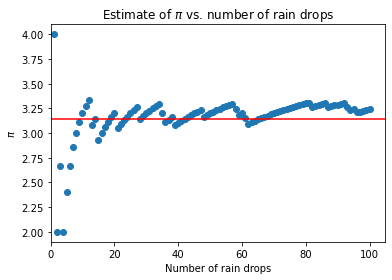

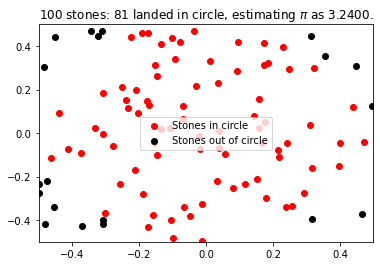

In [110]:
if __name__ == "__main__":

    number_of_stones = 100
    r = rain(number_of_stones, plot=True, format='png', dynamic=False)
    
    # Print to screen:
    print("----------------------")
    print("{} Stones".format(number_of_stones))
    print("pi estimated as:")
    print("\t%s" % (4 * r[0] / r[1]))
    print("----------------------")

----------------------
1000 Stones
pi estimated as:
	3.172
----------------------


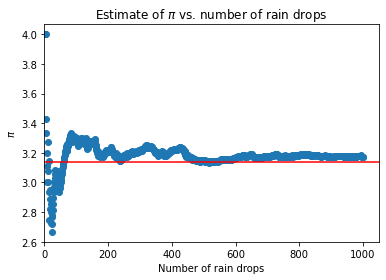

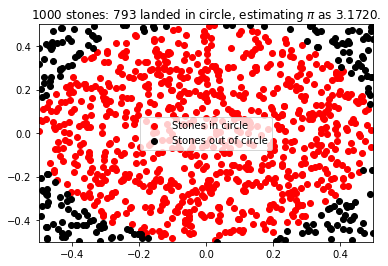

In [111]:
if __name__ == "__main__":

    number_of_stones = 1000
    r = rain(number_of_stones, plot=True, format='png', dynamic=False)
    
    # Print to screen:
    print("----------------------")
    print("{} Stones".format(number_of_stones))
    print("pi estimated as:")
    print("\t%s" % (4 * r[0] / r[1]))
    print("----------------------")

----------------------
10000 Stones
pi estimated as:
	3.1548
----------------------


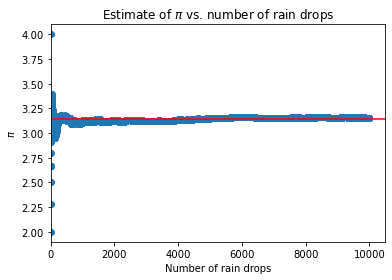

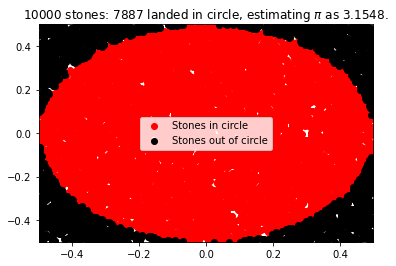

In [113]:
if __name__ == "__main__":

    number_of_stones = 10000
    r = rain(number_of_stones, plot=True, format='png', dynamic=False)
    
    # Print to screen:
    print("----------------------")
    print("{} Stones".format(number_of_stones))
    print("pi estimated as:")
    print("\t%s" % (4 * r[0] / r[1]))
    print("----------------------")

----------------------
50000 Stones
pi estimated as:
	3.1424
----------------------


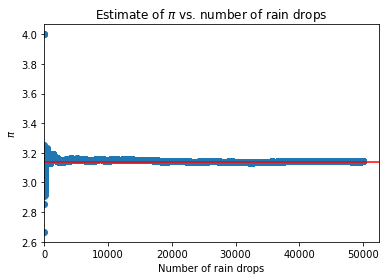

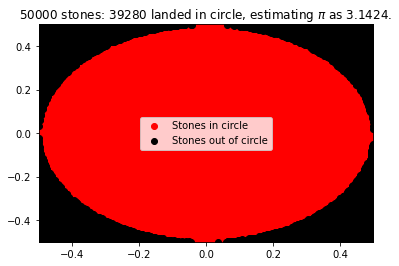

In [114]:
if __name__ == "__main__":

    number_of_stones = 50000
    r = rain(number_of_stones, plot=True, format='png', dynamic=False)
    
    # Print to screen:
    print("----------------------")
    print("{} Stones".format(number_of_stones))
    print("pi estimated as:")
    print("\t%s" % (4 * r[0] / r[1]))
    print("----------------------")